In [1]:

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
dataset = load_breast_cancer()

In [3]:

# read the dataset
X_names = dataset['feature_names']
X = dataset['data']
y_names = dataset['target_names']
y = dataset['target']
print('features:',X_names)
print('class labels:',y_names)

features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
class labels: ['malignant' 'benign']


In [5]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [7]:
print('use GridSearchCV to find the best hyperparameters for each classifier!')
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['rbf'],
                'gamma': [1e-6, 1e-5, 1e-4],
                'C': [0.1, 1, 10, 100, 1000]}]


print("# Tuning hyper-parameters")
clf = GridSearchCV(SVC(), parameters, cv=5)
clf.fit(X_train, y_train)


print('best parameters:')
print(clf.best_params_)
print('-------------------------------------')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    


use GridSearchCV to find the best hyperparameters for each classifier!
# Tuning hyper-parameters
best parameters:
{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}
-------------------------------------
0.879 (+/-0.067) for {'C': 0.1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.900 (+/-0.043) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.892 (+/-0.030) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.900 (+/-0.062) for {'C': 1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.908 (+/-0.037) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.924 (+/-0.020) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.908 (+/-0.029) for {'C': 10, 'gamma': 1e-06, 'kernel': 'rbf'}
0.908 (+/-0.033) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
0.937 (+/-0.042) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.916 (+/-0.012) for {'C': 100, 'gamma': 1e-06, 'kernel': 'rbf'}
0.945 (+/-0.031) for {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
0.934 (+/-0.071) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.932 (+/-0.048) for {'C': 1

In [9]:
LR_L1 = LogisticRegression(C=10, solver = 'liblinear', penalty='l1').fit(X_train, y_train)
LR_L2 = LogisticRegression(C=100, solver = 'liblinear', penalty='l2').fit(X_train, y_train)
SVM_linear = SVC(kernel="linear", C=0.001).fit(X_train, y_train)
SVM_rbf = SVC(kernel="rbf", C=1000, gamma=1e-5).fit(X_train, y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
RF = RandomForestClassifier(criterion='entropy',n_estimators=1000).fit(X_train, y_train)


In [13]:
print('linearSVM accuracy:',accuracy_score(y_test, SVM_linear.predict(X_test)))
print('rbf_SVM accuracy:',accuracy_score(y_test, SVM_rbf.predict(X_test)))
print('logistic_regression (L1) accuracy:',accuracy_score(y_test, LR_L1.predict(X_test)))
print('logistic_regression (L2) accuracy:',accuracy_score(y_test, LR_L2.predict(X_test)))
print('decision tree accuracy:',accuracy_score(y_test, DT.predict(X_test)))
print('Random Forest accuracy:',accuracy_score(y_test, RF.predict(X_test)))


linearSVM accuracy: 0.973404255319149
rbf_SVM accuracy: 0.9680851063829787
logistic_regression (L1) accuracy: 0.9627659574468085
logistic_regression (L2) accuracy: 0.9627659574468085
decision tree accuracy: 0.9521276595744681
Random Forest accuracy: 0.973404255319149


In [15]:
# this code is based on Bakharia'blog "Visualising Top Features in Linear SVM with Scikit Learn and Matplotlib"
# https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, clf_id, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(15, 5))
    plt.title(clf_id)
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
# for tree-based classifier's feature importance plotting
def plot_keyFeat_trees(classifier, feature_names, clf_id, top_features=10):
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    indices_vis = indices[:top_features]
    
    plt.figure()
    plt.figure(figsize=(15, 5))
    plt.title(clf_id)
    plt.bar(range(top_features), importances[indices_vis],
       color="r", align="center")
    plt.xticks(range(top_features), indices)
    plt.xlim([-1, top_features])
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, top_features), feature_names[indices_vis], rotation=60, ha='right')
    plt.show()

linearSVM accuracy: 0.973404255319149


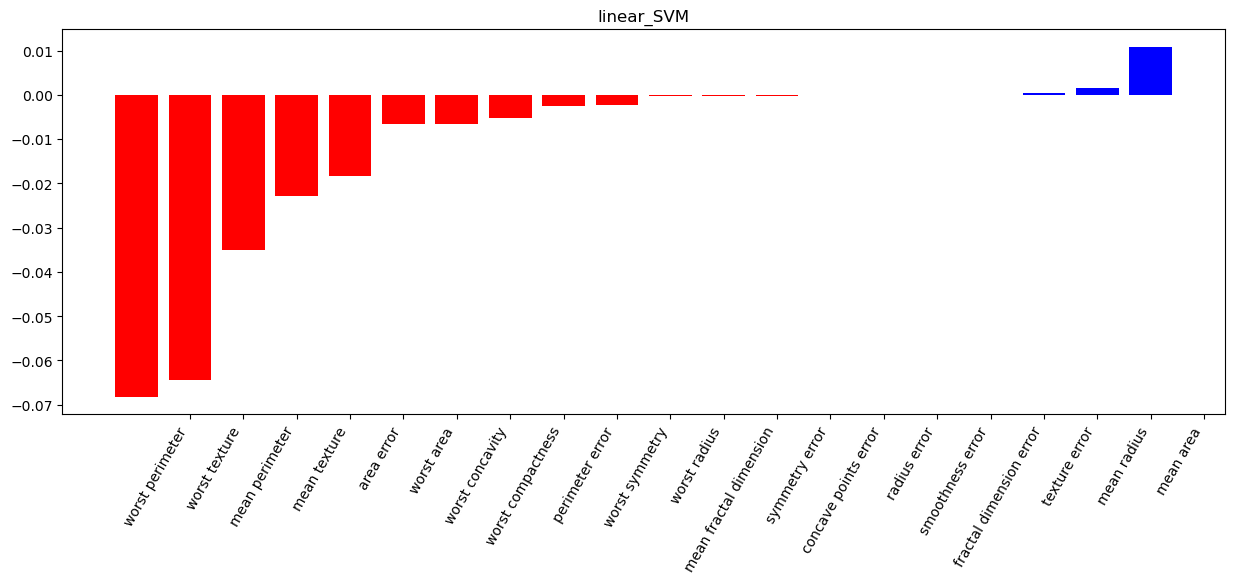

In [17]:
# classification and feature importance
print('linearSVM accuracy:',accuracy_score(y_test, SVM_linear.predict(X_test)))
plot_coefficients(SVM_linear, X_names, 'linear_SVM')

logistic_regression (L1) accuracy: 0.9627659574468085


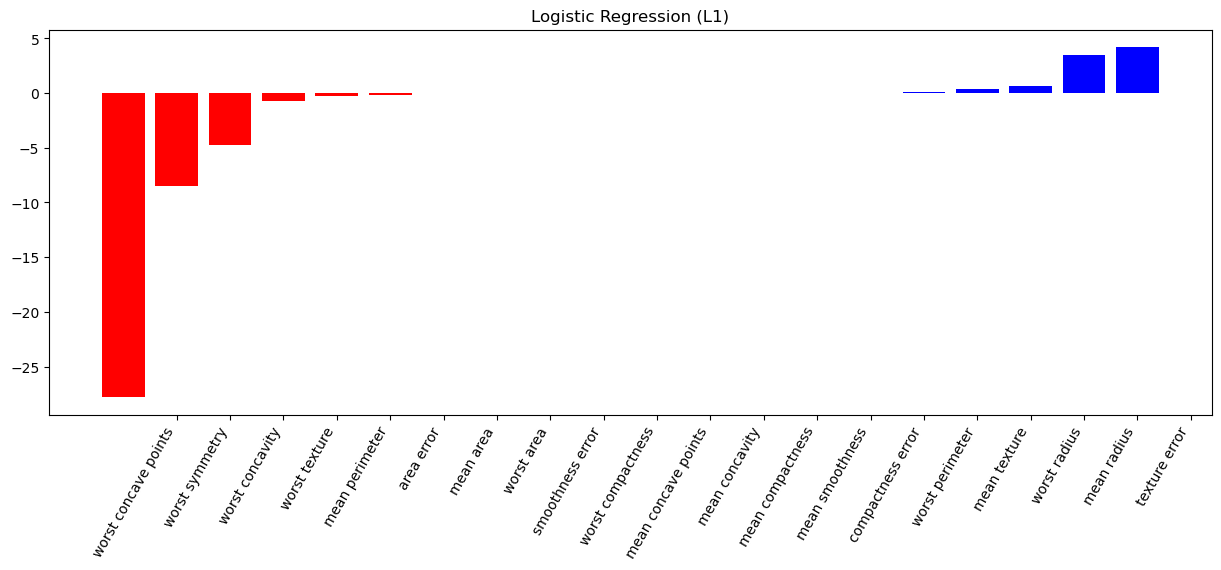

In [19]:
# classification and feature importance
print('logistic_regression (L1) accuracy:',accuracy_score(y_test, LR_L1.predict(X_test)))
plot_coefficients(LR_L1, X_names, 'Logistic Regression (L1)')

logistic_regression (L2) accuracy: 0.9627659574468085


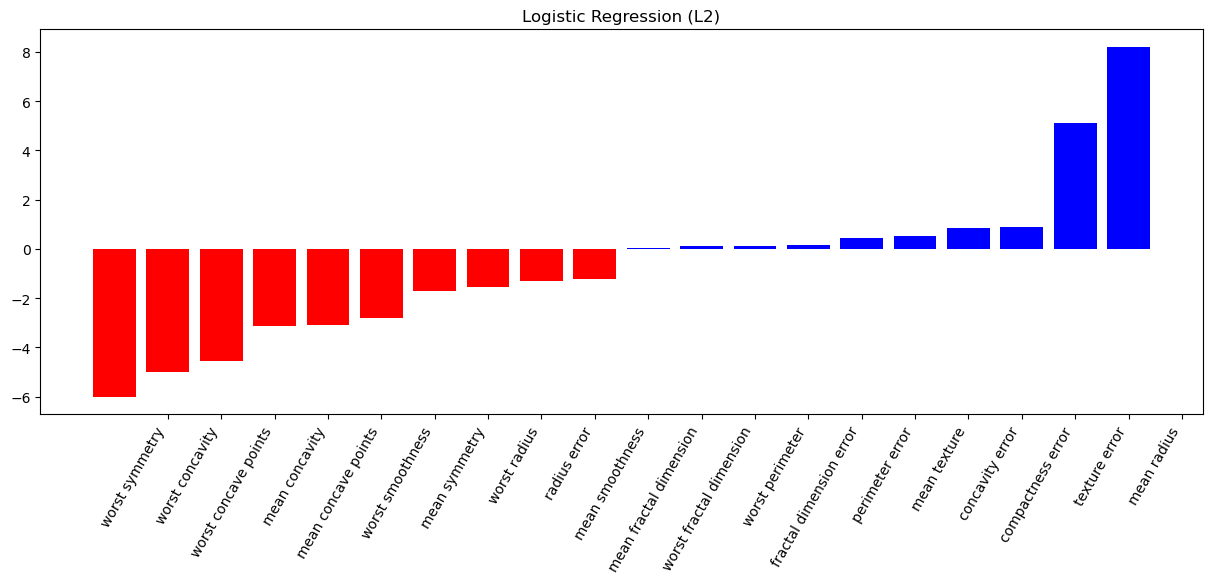

In [21]:
print('logistic_regression (L2) accuracy:',accuracy_score(y_test, LR_L1.predict(X_test)))
plot_coefficients(LR_L2, X_names, 'Logistic Regression (L2)')

decision tree accuracy: 0.9521276595744681


<Figure size 640x480 with 0 Axes>

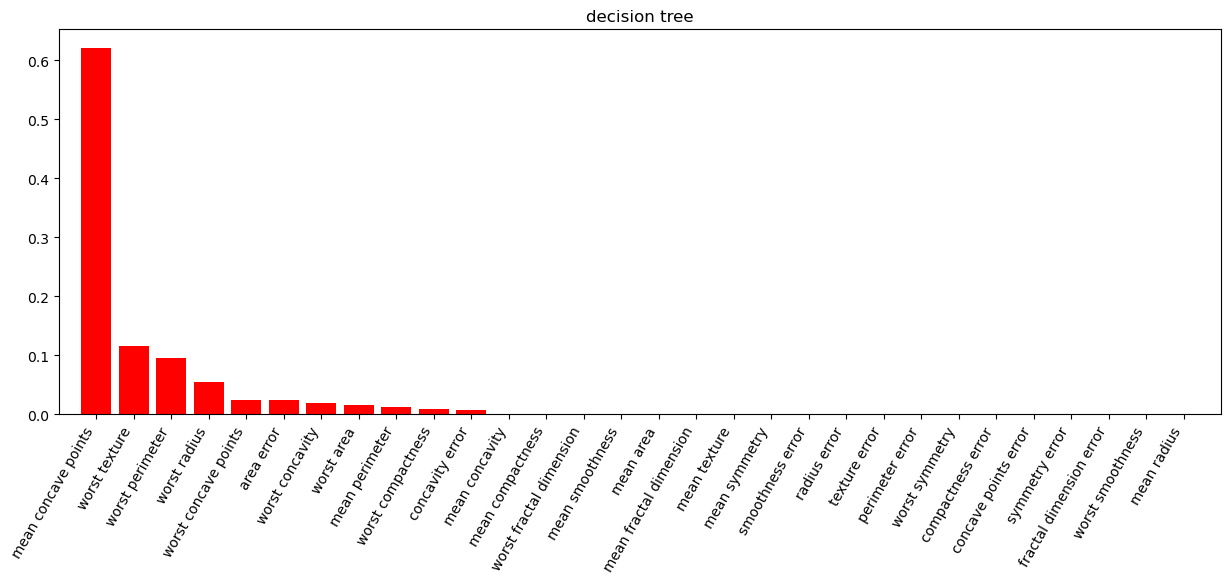

In [23]:
print('decision tree accuracy:',accuracy_score(y_test, DT.predict(X_test)))
plot_keyFeat_trees(DT, X_names, 'decision tree', top_features=30)

Random Forest accuracy: 0.973404255319149


<Figure size 640x480 with 0 Axes>

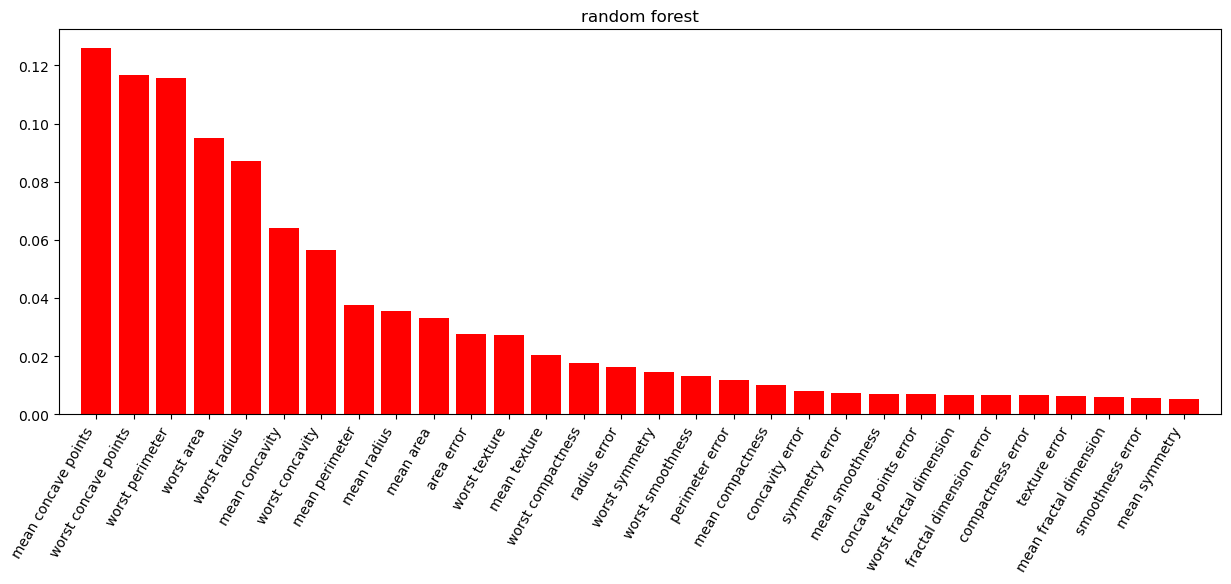

In [25]:
print('Random Forest accuracy:',accuracy_score(y_test, RF.predict(X_test)))
plot_keyFeat_trees(RF, X_names, 'random forest', top_features=30)